In [2]:
import pandas as pd 
import os 
import requests
import json 
import matplotlib.pyplot as plt

In [3]:
nyc_arrests=pd.read_csv('data/NYC_Arrests.csv')
nyc_arrests

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811
5,173130583,12/31/2017,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,K,73,0.0,18-24,M,BLACK,1007524.0,188555.0,40.684194,-73.916085
6,173129349,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0.0,18-24,F,WHITE HISPANIC,990592.0,202391.0,40.722199,-73.977122
7,173128438,12/31/2017,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,M,25,0.0,25-44,M,BLACK,999724.0,230625.0,40.799683,-73.944112
8,173128437,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,2.0,25-44,M,BLACK HISPANIC,998165.0,226184.0,40.787496,-73.949752
9,173128433,12/31/2017,705.0,"FORGERY,ETC.-MISD.",358.0,OFFENSES INVOLVING FRAUD,PL 1702000,M,M,17,0.0,18-24,M,WHITE,991195.0,212559.0,40.750107,-73.974936


In [4]:
nyc_arrests['OFNS_DESC'].unique()
#offenses to focus on: ROBBERY,DANGEROUS DRUGS,FELONY ASSAULT,GRAND LARCENY,BURGLARY,SEX CRIMES
#GRAND LARCENY OF MOTOR VEHICLE,RAPE,MURDER & NON-NEGL. MANSLAUGHTER

array(['MISCELLANEOUS PENAL LAW', 'OTHER OFFENSES RELATED TO THEFT',
       'OTHER STATE LAWS', 'ASSAULT 3 & RELATED OFFENSES', 'ROBBERY',
       'DANGEROUS DRUGS', 'OFFENSES INVOLVING FRAUD', 'PETIT LARCENY',
       'FELONY ASSAULT', 'DANGEROUS WEAPONS',
       'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
       'INTOXICATED/IMPAIRED DRIVING', 'INTOXICATED & IMPAIRED DRIVING',
       'CRIMINAL MISCHIEF & RELATED OFFENSES', 'GRAND LARCENY',
       'VEHICLE AND TRAFFIC LAWS', 'BURGLARY',
       'OFFENSES AGAINST PUBLIC ADMINISTRATION',
       'OTHER TRAFFIC INFRACTION', 'SEX CRIMES', 'ARSON',
       'CRIMINAL TRESPASS', "BURGLAR'S TOOLS",
       'ALCOHOLIC BEVERAGE CONTROL LAW',
       'UNAUTHORIZED USE OF A VEHICLE 3 (UUV)', 'FORGERY',
       'OTHER STATE LAWS (NON PENAL LAW)', 'ENDAN WELFARE INCOMP',
       'OFF. AGNST PUB ORD SENSBLTY &', 'FRAUDS',
       'PROSTITUTION & RELATED OFFENSES', 'OFFENSES AGAINST THE PERSON',
       'POSSESSION OF STOLEN PROPERTY 5',
       'OFFENSES AGA

In [55]:
nyc_arrests['OFNS_DESC'].value_counts()

DANGEROUS DRUGS                                1056389
BURGLARY                                        830187
FELONY ASSAULT                                  641439
OTHER STATE LAWS                                240418
CRIMINAL TRESPASS                               196181
VEHICLE AND TRAFFIC LAWS                        186049
DANGEROUS WEAPONS                               182926
OTHER TRAFFIC INFRACTION                        171304
MISCELLANEOUS PENAL LAW                         164469
OFFENSES AGAINST PUBLIC ADMINISTRATION          156544
CRIMINAL MISCHIEF & RELATED OFFENSES            146039
ROBBERY                                         144080
INTOXICATED & IMPAIRED DRIVING                   94685
OTHER STATE LAWS (NON PENAL LAW)                 79152
FORGERY                                          77850
SEX CRIMES                                       76670
OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV      66242
DISORDERLY CONDUCT                               30156
OFFENSES I

In [56]:
brooklyn_arrests=nyc_arrests.loc[nyc_arrests['ARREST_BORO']=='K']
brooklyn_arrests

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
5,173130583,12/31/2017,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,K,73,0.0,18-24,M,BLACK,1007524.0,188555.0,40.684194,-73.916085
10,173128430,12/31/2017,101.0,ASSAULT 3,344.0,FELONY ASSAULT,PL 1200002,M,K,83,0.0,25-44,M,WHITE HISPANIC,1003807.0,195345.0,40.702840,-73.929467
11,173128428,12/31/2017,339.0,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",341.0,BURGLARY,PL 1552500,M,K,61,0.0,65+,F,WHITE,997477.0,154359.0,40.590354,-73.952377
12,173126364,12/31/2017,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,60,0.0,<18,F,BLACK,986771.0,148698.0,40.574825,-73.990927
14,173123525,12/31/2017,779.0,"PUBLIC ADMINISTRATION,UNCLASSIFIED FELONY",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,67,0.0,18-24,M,BLACK,999189.0,174694.0,40.646167,-73.946168
29,173121081,12/31/2017,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",109.0,BURGLARY,PL 1553004,F,K,90,0.0,25-44,M,BLACK,998016.0,196598.0,40.706290,-73.950350
34,173120423,12/31/2017,113.0,"MENACING,UNCLASSIFIED",344.0,FELONY ASSAULT,PL 1201500,M,K,67,0.0,45-64,M,BLACK,1003257.0,177086.0,40.652725,-73.931502
46,173129126,12/31/2017,101.0,ASSAULT 3,344.0,FELONY ASSAULT,PL 1200001,M,K,78,0.0,45-64,F,BLACK,990287.0,184429.0,40.672898,-73.978238
51,173115841,12/31/2017,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFITI",351.0,CRIMINAL MISCHIEF & RELATED OFFENSES,PL 1456002,M,K,66,0.0,25-44,M,WHITE,990399.0,164172.0,40.617297,-73.977853


In [57]:
brooklyn_date=pd.concat([brooklyn_arrests.drop('ARREST_DATE', axis = 1), 
          (brooklyn_arrests.ARREST_DATE.str.split("/|T").str[:3].apply(pd.Series)
          .rename(columns={0:'month', 1:'day', 2:'year'}))], axis = 1)
brooklyn_date

,ARREST_KEY,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,month,day,year
2,173113513,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572,12,31,2017
5,173130583,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,K,73,0.0,18-24,M,BLACK,1007524.0,188555.0,40.684194,-73.916085,12,31,2017
10,173128430,101.0,ASSAULT 3,344.0,FELONY ASSAULT,PL 1200002,M,K,83,0.0,25-44,M,WHITE HISPANIC,1003807.0,195345.0,40.702840,-73.929467,12,31,2017
11,173128428,339.0,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",341.0,BURGLARY,PL 1552500,M,K,61,0.0,65+,F,WHITE,997477.0,154359.0,40.590354,-73.952377,12,31,2017
12,173126364,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,60,0.0,<18,F,BLACK,986771.0,148698.0,40.574825,-73.990927,12,31,2017
14,173123525,779.0,"PUBLIC ADMINISTRATION,UNCLASSIFIED FELONY",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,67,0.0,18-24,M,BLACK,999189.0,174694.0,40.646167,-73.946168,12,31,2017
29,173121081,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",109.0,BURGLARY,PL 1553004,F,K,90,0.0,25-44,M,BLACK,998016.0,196598.0,40.706290,-73.950350,12,31,2017
34,173120423,113.0,"MENACING,UNCLASSIFIED",344.0,FELONY ASSAULT,PL 1201500,M,K,67,0.0,45-64,M,BLACK,1003257.0,177086.0,40.652725,-73.931502,12,31,2017
46,173129126,101.0,ASSAULT 3,344.0,FELONY ASSAULT,PL 1200001,M,K,78,0.0,45-64,F,BLACK,990287.0,184429.0,40.672898,-73.978238,12,31,2017
51,173115841,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFITI",351.0,CRIMINAL MISCHIEF & RELATED OFFENSES,PL 1456002,M,K,66,0.0,25-44,M,WHITE,990399.0,164172.0,40.617297,-73.977853,12,31,2017


In [58]:
brooklyn_data=brooklyn_date.rename(columns={'ARREST_KEY':'Arrest Key','OFNS_DESC':'Type of Offense',
                                           'ARREST_BORO':'Borough','year':'Year'})
brooklyn_data=brooklyn_data[['Arrest Key','Type of Offense','Year']]
brooklyn_data.head()

,Arrest Key,Type of Offense,Year
2,173113513,OTHER STATE LAWS,2017
5,173130583,ROBBERY,2017
10,173128430,FELONY ASSAULT,2017
11,173128428,BURGLARY,2017
12,173126364,FELONY ASSAULT,2017


In [59]:
bk_arrests=brooklyn_data.groupby(['Type of Offense','Year'])

arrest_counts = bk_arrests.count()
arrest_counts

Arrest Key
Type of Offense                        Year            
ABORTION                               2018           2
ADMINISTRATIVE CODE                    2006           9
                                       2007          14
                                       2008           7
                                       2009           2
                                       2010           7
                                       2011           2
                                       2012           6
                                       2013           1
                                       2014         398
                                       2015        2712
                                       2016        2659
                                       2017        1621
                                       2018         698
ADMINISTRATIVE CODES                   2014           9
                                       2015          42
                                       2016          12
                                       2017           8
                                       2018           6
ALCOHOLIC BEVERAGE CONTROL LAW         2006         103
                                       2007         161
                                       2008          89
                                       2009          85
                                       2010         142
                                       2011          92
                                       2012         126
                                       2013          73
                                       2014          87
                                       2015          80
                                       2016         246
...                                                 ...
UNAUTHORIZED USE OF A VEHICLE 3 (UUV)  2006         209
                                       2007         185
                                       2008         188
                                       2009         257
                                       2010         283
                                       2011         274
                                       2012         291
                                       2013         345
                                       2014         379
                                       2015         274
                                       2016         313
                                       2017         264
                                       2018         248
UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS 2006           6
                                       2007           4
                                       2012           2
                                       2013           1
VEHICLE AND TRAFFIC LAWS               2006        1377
                                       2007        1761
                                       2008        1460
                                       2009        1779
                                       2010        1773
                                       2011        1943
                                       2012        3690
                                       2013        4528
                                       2014        5273
                                       2015        4337
                                       2016        4623
                                       2017        4846
                                       2018        4464

[706 rows x 1 columns]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<function matplotlib.pyplot.show(*args, **kw)>

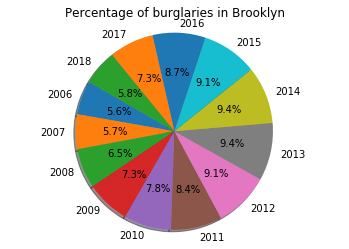

In [60]:
offense_type='BURGLARY'

bk_type=arrest_counts.loc[offense_type]
labels=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

plt.pie(bk_type,labels=labels,autopct="%1.1f%%",shadow=True,startangle=150)
plt.title('Percentage of burglaries in Brooklyn')
plt.axis("equal")
plt.savefig('data/bkburglaries.png')
plt.show

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


<function matplotlib.pyplot.show(*args, **kw)>

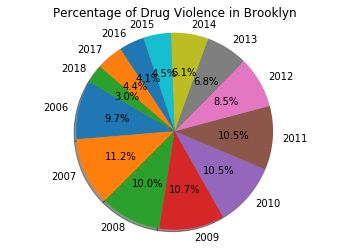

In [61]:
offense_type='DANGEROUS DRUGS'

bk_type=arrest_counts.loc[offense_type]



labels=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

plt.pie(bk_type,labels=labels,autopct="%1.1f%%",shadow=True,startangle=150)
plt.title('Percentage of Drug Violence in Brooklyn')
plt.axis("equal")
plt.savefig('data/bkdrugs.png')
plt.show

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


<function matplotlib.pyplot.show(*args, **kw)>

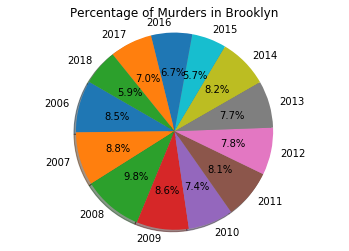

In [62]:
offense_type='MURDER & NON-NEGL. MANSLAUGHTER'

bk_type=arrest_counts.loc[offense_type]



labels=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

plt.pie(bk_type,labels=labels,autopct="%1.1f%%",shadow=True,startangle=150)
plt.title('Percentage of Murders in Brooklyn')
plt.axis("equal")
plt.savefig('data/bkmurder.png')
plt.show

In [63]:
bk_burglaries=brooklyn_data[brooklyn_data['Type of Offense']=='BURGLARY'].groupby([brooklyn_data['Year']])

In [64]:
burglary_total=bk_burglaries['Arrest Key'].count()
burglary_total

Year
2006    11129
2007    11362
2008    13020
2009    14480
2010    15480
2011    16764
2012    18078
2013    18862
2014    18862
2015    18231
2016    17274
2017    14630
2018    11518
Name: Arrest Key, dtype: int64

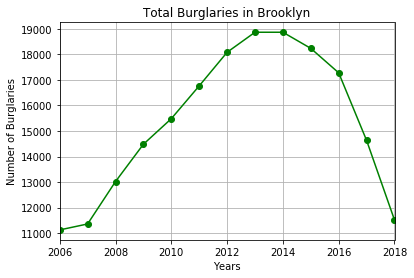

<Figure size 432x288 with 0 Axes>

In [65]:
bk_chart = burglary_total.plot(kind="line", title="Total Burglaries in Brooklyn",marker='o',c='g')
plt.xlabel("Years")
plt.ylabel("Number of Burglaries")
plt.savefig('data/Totalburglariesbk.png')
plt.grid()
plt.show()


plt.tight_layout()

In [21]:
bk_drugs=brooklyn_data[brooklyn_data['Type of Offense']=='DANGEROUS DRUGS'].groupby([brooklyn_data['Year']])

In [22]:
drugs_total=bk_drugs['Arrest Key'].count()
drugs_total

Year
2006    31004
2007    35899
2008    32119
2009    34430
2010    33627
2011    33625
2012    27318
2013    21903
2014    19754
2015    14610
2016    13274
2017    14029
2018     9678
Name: Arrest Key, dtype: int64

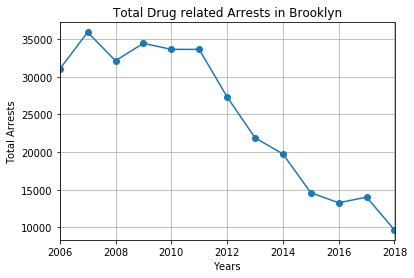

<Figure size 432x288 with 0 Axes>

In [32]:
bk_chart = drugs_total.plot(kind="line", title="Total Drug related Arrests in Brooklyn",marker='o')
plt.xlabel("Years")
plt.ylabel("Total Arrests")
plt.grid()
plt.savefig('data/druggridbk')
plt.show()

plt.tight_layout()

In [25]:
bk_murd=brooklyn_data[brooklyn_data['Type of Offense']=='MURDER & NON-NEGL. MANSLAUGHTER'].groupby([brooklyn_data['Year']])
murd_total=bk_murd['Arrest Key'].count()
murd_total

Year
2006    256
2007    263
2008    295
2009    257
2010    222
2011    243
2012    233
2013    232
2014    245
2015    170
2016    202
2017    209
2018    176
Name: Arrest Key, dtype: int64

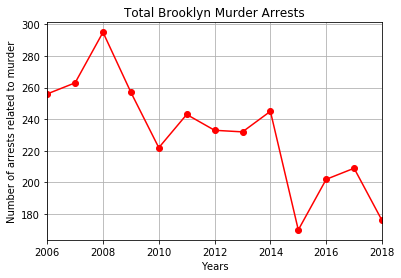

<Figure size 432x288 with 0 Axes>

In [33]:
bk_chart = murd_total.plot(kind="line", title="Total Brooklyn Murder Arrests",marker='o',c='r')
plt.xlabel("Years")
plt.ylabel("Number of arrests related to murder")
plt.grid()
plt.savefig('data/murdersbkgrid')
plt.show()

plt.tight_layout()

In [53]:
bk_rob=brooklyn_data[brooklyn_data['Type of Offense']=='ROBBERY'].groupby([brooklyn_data['Year']])
rob_total=bk_rob['Arrest Key'].count()
rob_total

Year
2006    4020
2007    3944
2008    4615
2009    3792
2010    3703
2011    3864
2012    3710
2013    3470
2014    3318
2015    3473
2016    3161
2017    2915
2018    2783
Name: Arrest Key, dtype: int64

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


<function matplotlib.pyplot.show(*args, **kw)>

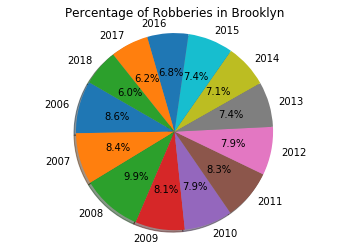

In [52]:
offense_type='ROBBERY'

bk_type=arrest_counts.loc[offense_type]



labels=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

plt.pie(bk_type,labels=labels,autopct="%1.1f%%",shadow=True,startangle=150)
plt.title('Percentage of Robberies in Brooklyn')
plt.axis("equal")
plt.savefig('data/bkrobbery.png')
plt.show

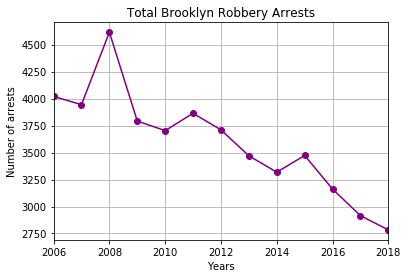

<Figure size 432x288 with 0 Axes>

In [66]:
bk_chart = rob_total.plot(kind="line", title="Total Brooklyn Robbery Arrests",marker='o',c='purple')
plt.xlabel("Years")
plt.ylabel("Number of arrests")
plt.grid()
plt.savefig('data/robbkgrid')
plt.show()

plt.tight_layout()